# Part II - Fordgobike
## by Thane Murphy

## Investigation Overview



My overall goal of this slide deck is to identify high traffic times based on customers and subscribers to the FordGoBike in San Francisco. Overall we want to look duration of use, start times, who is using the bikes and what times they are most used. Also, we must look into the busiest days of the week. This will give us an understanding of the traffic associated with San Francisco and the people who either want to stay green or would rather avoid heavy traffic. 


## Dataset Overview and Executive Summary

> 
This data will cover duration of use, start times, who is using the bikes, what times they are most used, and the busiest days of the week. The data that is provided identifies these concepts but there was a requirement to change the date time to be converted to weekdays/weekends. Overall we will get an understanding of traffic patterns and what the bikes are used for based on the times they are used. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike_df_copy.csv')

## (Visualization 1)

> Visualization 1 identifies the duration of trips taken compared to the amount of trip taken.

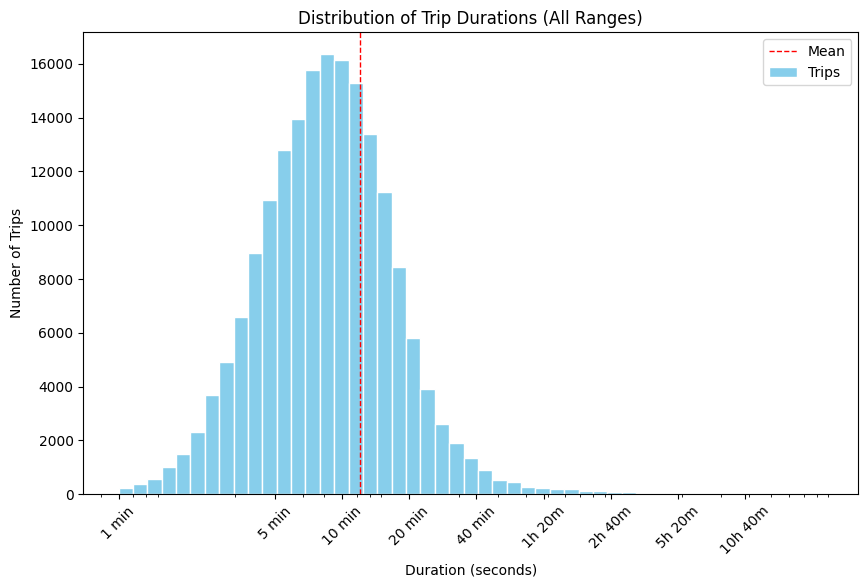

In [3]:
# Histogram of trip durations (including longer trips)
plt.figure(figsize=(10, 6))
plt.hist(df['duration_sec'], bins=np.logspace(np.log10(60), np.log10(df['duration_sec'].max()), 50), color='skyblue', edgecolor='white')
plt.title('Distribution of Trip Durations (All Ranges)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([60, 300, 600, 1200, 2400, 4800, 9600, 19200, 38400], ['1 min', '5 min', '10 min', '20 min', '40 min', '1h 20m', '2h 40m', '5h 20m', '10h 40m'], rotation=45)
plt.axvline(df['duration_sec'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.legend(['Mean', 'Trips'])
plt.show()

In [4]:
#Comment: Here we see that trips in San Francisco according to the data set had an average duration of a little over 10 munites with maxes being higher than 10 hours and lows being around 1 minute. 

## (Visualization 2)

> This identifies the amount of trips taken by either Customers or Subscribers based on week day. 

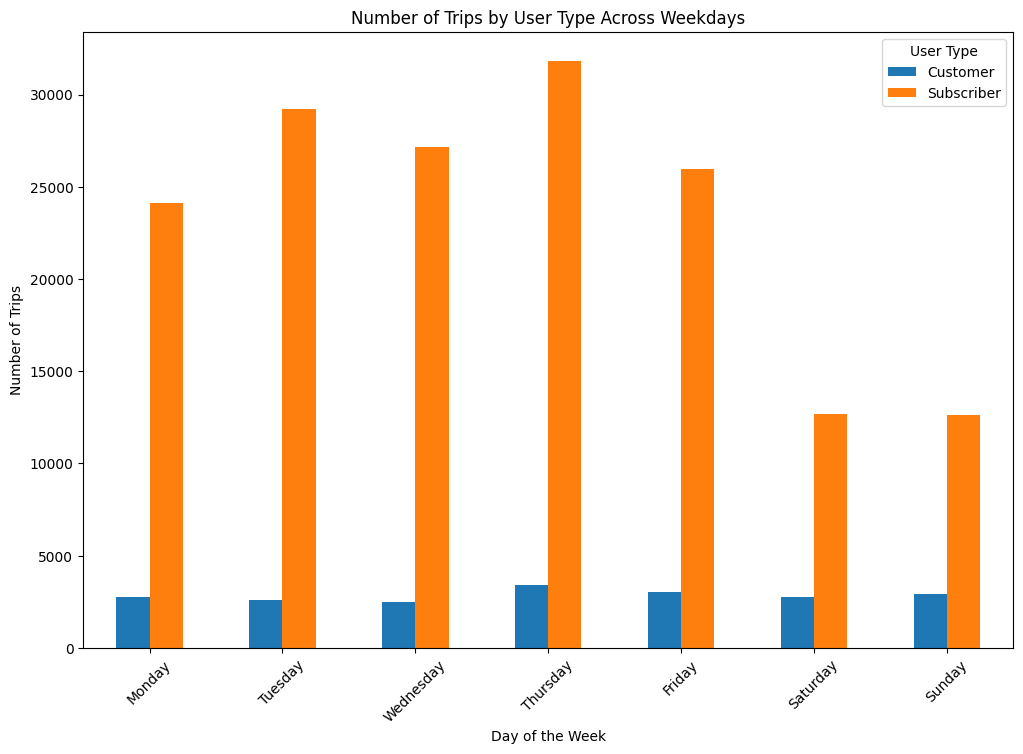

In [5]:
# Assuming 'weekday' is already a column in fordgobike_df
# Convert 'weekday' to a categorical type with a defined order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=weekday_order, ordered=True)

# Count the number of trips for each user type across weekdays
trip_counts = df.groupby(['weekday', 'user_type']).size().unstack()

# Plot the counts
trip_counts.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Trips by User Type Across Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.show()


In [6]:
#Comment: With the data the amount of subscribers triumph over the Customers in volumnet and both seem to have a common trend of a higher amount of trips on thursdays. The lowest amount of trips being Sunday for subscribers and Wednesday for Customers. 

## (Visualization 3)

> This identifies the trip duration based on start time with Subscribers being blue and Customers being orange. 

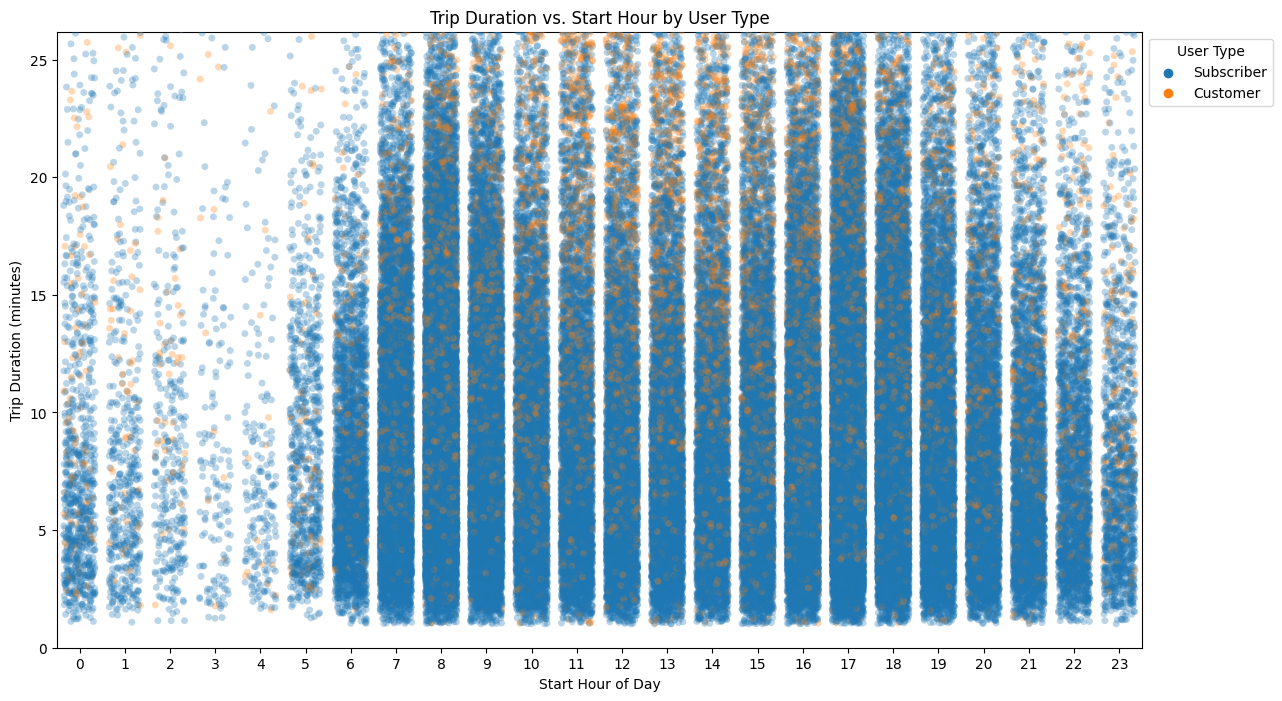

In [7]:
# Assuming df is your DataFrame and 'start_time' is currently a string
# Convert 'start_time' to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Now that 'start_time' is in datetime format, you can extract the hour
df['start_hour'] = df['start_time'].dt.hour

# Continue with your plotting code
plt.figure(figsize=(14, 8))
sb.stripplot(data=df, x='start_hour', y='duration_min', hue='user_type', alpha=0.3, jitter=0.35)

plt.title('Trip Duration vs. Start Hour by User Type')
plt.xlabel('Start Hour of Day')
plt.ylabel('Trip Duration (minutes)')

# Limiting the y-axis to focus on more common trip durations and reduce the impact of outliers
plt.ylim(0, df['duration_min'].quantile(0.95))

# Move the legend outside of the plot area
plt.legend(title='User Type', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

In [8]:
#Comment: Here we identify the trip duration in minutes based on the hour of the day they started. This is broken up into color to identify Subscribers in Blue and Customers in Orange. We see a trend of higher trip durations between 7am-9am and 4pm-6pm which is core working hours. the concentration of customers are within the 10am and 4pm and spread pretty thin outside of those times.   

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
